In [2]:
import os
os.environ['PROJ_LIB'] = '/home/disk/p/jkcm/anaconda3/envs/measures/share/proj'
import sys
sys.path.insert(0, '/home/disk/p/jkcm/Code')
import matplotlib as mpl
import pickle
import seaborn as sns
import numpy as np
from matplotlib import colors
from matplotlib.lines import Line2D
import pandas as pd
import glob
import xarray as xr
import matplotlib.pyplot as plt
# import datetime as dt
# from Lagrangian_CSET import met_utils as mu
# import multiprocessing as mp
# from tools.LoopTimer import LoopTimer
# from Lagrangian_CSET import utils
# from multiprocessing import Pool, cpu_count
import utils
import pandas as pd
from matplotlib.image import NonUniformImage

%load_ext autoreload
%autoreload 2
print("we workin'!")

we workin'!


In [3]:
all_sep_df = pd.DataFrame()
for year in ['2014', '2015', '2016']:
    savefile = f'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/classified_df_final.SEP_{year}_5.pickle'
    temp_df = pickle.load(open(savefile, 'rb'))
    all_sep_df = pd.concat([all_sep_df, temp_df], ignore_index=True)
# sep_tropics = all_sep_df[np.logical_and(all_sep_df.lat<20,all_sep_df.lat>-20)]
# sep_subtropics = all_sep_df[np.logical_and(all_sep_df.lat<-20, all_sep_df.lat>-30)]
# sep_midlat = all_sep_df[all_sep_df.lat<-30]
# sep_summer = all_sep_df[all_sep_df.season=='DJF']
# sep_winter = all_sep_df[all_sep_df.season=='JJA']
true_sep = all_sep_df[all_sep_df.lat<0]
# true_sep = all_sep_df[all_sep_df.lat>-30]
# true_sep_summer = true_sep[true_sep.season=='DJF']
# true_sep_winter = true_sep[true_sep.season=='JJA']
# best_sep_df = true_sep[true_sep.lat>-40]
plot_df = true_sep

In [4]:
all_cset_df = pickle.load(open('/home/disk/eos4/jkcm/Data/MEASURES/beta_data/cset_with_clim_MERRA.pickle', 'rb'))
all_cset_df = all_cset_df.rename(columns={'asmr_local_anom': 'amsr_cwv_anom'})
cset_subtropics = all_cset_df[all_cset_df.lat<30]
cset_midlat = all_cset_df[all_cset_df.lat>30]

In [5]:
def add_labels(axn, shift_data=True):
    for i, axi in enumerate(axn):
        letter = chr(ord('a') + i)
        axi.text(0.015, 0.985, f'({letter})', fontsize=12, horizontalalignment='left', verticalalignment='top', transform=axi.transAxes,
                backgroundcolor='w')

        if shift_data:
            xlim, ylim = axi.transData.inverted().transform(axi.transAxes.transform((0.1, 0.9)))
            for i in axi.get_lines():
                if i.get_xdata()[0] <= xlim and i.get_ydata()[0] >= ylim:
                    ylow, yhigh = axi.get_ylim() 
                    ydiff = yhigh - ylow
                    axi.set_ylim(ylow, ylow + ydiff*1.1)
                    break
    return

def plot_all_var(plot_df, name, ax, ylabel, args_dict, scale=1):
    utils.plot_mean_by_cat_b(plot_df, name, ax=ax, scale_factor=scale, **args_dict['local'])
    utils.plot_mean_by_cat_b(plot_df, name+'_region', ax=ax, scale_factor=scale, **args_dict['region'])
    utils.plot_mean_by_cat_b(plot_df, name+'_climo', ax=ax, scale_factor=scale, **args_dict['climo'])
    for xi in [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]:
        ax.axvline(xi+0.05, linestyle='-', color='k', lw=0.5, alpha=0.5)
    ax.grid(axis='y')
    ax.set_ylabel(ylabel)
    ax.set_xlim((-0.55, 6.55))
    
local_plargs = dict(marker='o', ms=12, mec='k', label='Mesoscale (1$^{\circ}$) avg.')
region_plargs = dict(offset=-0.3, marker='d', ms=8, mec='k', alpha=0.5, label='Synoptic (10$^{\circ}$) avg.')
climo_plargs = dict(offset=0.3, marker='s', ms=8, mec='k', alpha=0.5, label='Climatology (seas. avg.)')
args_dict = {'local': local_plargs, 'region': region_plargs, 'climo': climo_plargs}

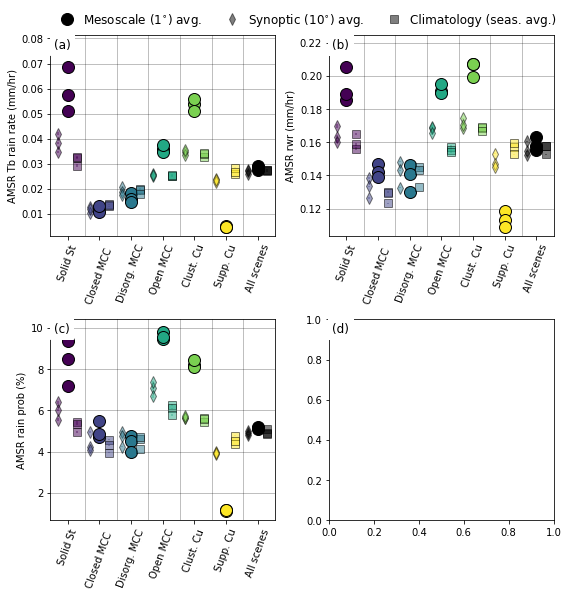

In [6]:
#precip plots

fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(figsize=(8,8), ncols=2, nrows=2, sharex=False)

plot_all_var(plot_df, 'amsr_tb_rate', ax0, ylabel='AMSR Tb rain rate (mm/hr)', args_dict=args_dict)
plot_all_var(plot_df, 'amsr_tb_rwr', ax1,  ylabel='AMSR rwr (mm/hr)', args_dict=args_dict)
plot_all_var(plot_df, 'amsr_tb_prob', ax2, scale=100, ylabel='AMSR rain prob (%)', args_dict=args_dict)
# plot_all_var(plot_df, 'amsr_cwv', ax3, ylabel='AMSR CWV (kg m$^{-2}$)', args_dict=args_dict)

# ax1.set_ylim(min(ax0.get_ylim()[0], ax1.get_ylim()[0]), max(ax0.get_ylim()[1], ax1.get_ylim()[1]));
# ax0.set_ylim(ax1.get_ylim())
# ax1.axhline(y=0, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[1], c='k')

add_labels([ax0, ax1, ax2, ax3])
plt.tight_layout()
legend_elements = [Line2D([0], [0], linestyle="None", color='k', **plargs) for plargs in [
    {i:plargs[i] for i in plargs if i!='offset'} for plargs in [local_plargs, region_plargs, climo_plargs]]]
ax0.legend(handles=legend_elements, loc='lower left', bbox_to_anchor= (0.0, 1.01), fontsize=12, ncol=3, 
           borderaxespad=0, frameon=False, handletextpad=0.3, columnspacing=1.5)

# fig.savefig('/home/disk/p/jkcm/plots/measures/final/local_vars.png', bbox_inches='tight')

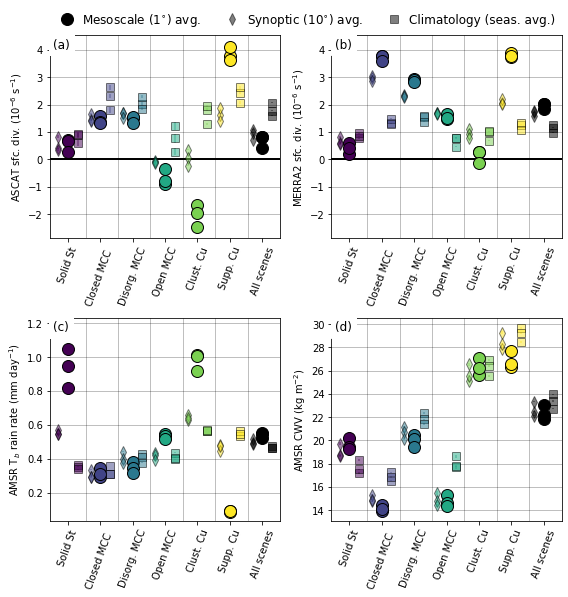

In [41]:
fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(figsize=(8,8), ncols=2, nrows=2, sharex=False)


plot_all_var(plot_df, 'ascat_div', ax0, scale=1e6, ylabel='ASCAT sfc. div. (10$^{-6}$ s$^{-1}$)', args_dict=args_dict)
plot_all_var(plot_df, 'MERRA2_sfc_div', ax1, scale=1e6, ylabel='MERRA2 sfc. div. (10$^{-6}$ s$^{-1}$)', args_dict=args_dict)
# plot_all_var(plot_df, 'MERRA_WSPD_10M', ax2, ylabel='MERRA wpsd. (m s$^{-1}$)', args_dict=args_dict)
plot_all_var(plot_df, 'amsr_tb_rate', ax2, scale=24, ylabel='AMSR T$_b$ rain rate (mm day$^{-1}$)', args_dict=args_dict)
plot_all_var(plot_df, 'amsr_cwv', ax3, ylabel='AMSR CWV (kg m$^{-2}$)', args_dict=args_dict)

ax1.set_ylim(min(ax0.get_ylim()[0], ax1.get_ylim()[0]), max(ax0.get_ylim()[1], ax1.get_ylim()[1]));
ax0.set_ylim(ax1.get_ylim())
ax1.axhline(y=0, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[1], c='k')

add_labels([ax0, ax1, ax2, ax3])
plt.tight_layout()
legend_elements = [Line2D([0], [0], linestyle="None", color='k', **plargs) for plargs in [
    {i:plargs[i] for i in plargs if i!='offset'} for plargs in [local_plargs, region_plargs, climo_plargs]]]
ax0.legend(handles=legend_elements, loc='lower left', bbox_to_anchor= (0.0, 1.01), fontsize=12, ncol=3, 
           borderaxespad=0, frameon=False, handletextpad=0.3, columnspacing=1.5)

# fig.savefig('/home/disk/p/jkcm/plots/measures/final/local_vars.png', bbox_inches='tight')

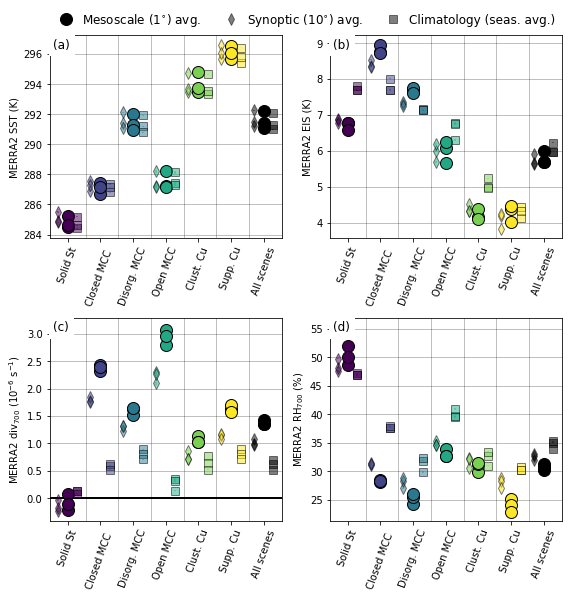

In [8]:
fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(figsize=(8,8), ncols=2, nrows=2, sharex=False)

plot_all_var(plot_df, 'MERRA2_SST', ax0, ylabel='MERRA2 SST (K)', args_dict=args_dict)
plot_all_var(plot_df, 'MERRA2_EIS', ax1, ylabel='MERRA2 EIS (K)', args_dict=args_dict)
plot_all_var(plot_df, 'MERRA2_div_700', ax2, scale=-1e6, ylabel='MERRA2 div$_{700}$ (10$^{-6}$ s$^{-1}$)', args_dict=args_dict)
plot_all_var(plot_df, 'MERRA2_RH_700', ax3, scale=100, ylabel='MERRA2 RH$_{700}$ (%)', args_dict=args_dict)


add_labels([ax0, ax1, ax2, ax3])
plt.tight_layout()
legend_elements = [Line2D([0], [0], linestyle="None", color='k', **plargs) for plargs in [
    {i:plargs[i] for i in plargs if i!='offset'} for plargs in [local_plargs, region_plargs, climo_plargs]]]
ax0.legend(handles=legend_elements, loc='lower left', bbox_to_anchor= (0.0, 1.01), fontsize=12, ncol=3, 
           borderaxespad=0, frameon=False, handletextpad=0.3, columnspacing=1.5)

# fig.savefig('/home/disk/p/jkcm/plots/measures/final/environmental_vars.png', bbox_inches='tight')

In [33]:
plot_df['low_cf']

0         0.628214
1         0.526418
2         0.552630
3         0.749777
4         0.608894
            ...   
629254    0.264077
629255    0.269958
629256    0.368627
629257    0.304096
629258    0.490287
Name: low_cf, Length: 587080, dtype: float64

/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/pandas/core/generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

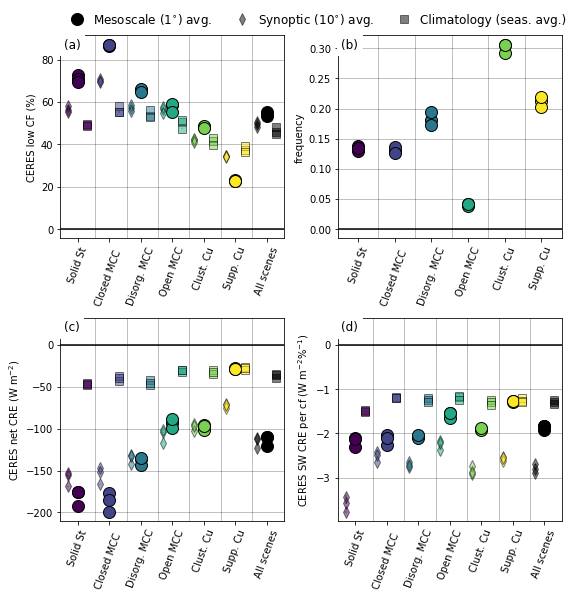

In [35]:
fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(figsize=(8,8), ncols=2, nrows=2, sharex=False)
modis_cf_plargs = dict(marker='o', ms=10, label='MODIS CF')
ceres_cf_plargs = dict(offset=-0.2, marker='d', ms=10, label='CERES CF')
# climo_plargs = dict(offset=0.2, marker='s', mfc='w', ms=8, label='Climatology')

# utils.plot_mean_by_cat_b(plot_df, 'low_cf', ax=ax0, scale_factor=100, **modis_cf_plargs)
# utils.plot_mean_by_cat_b(plot_df, 'ceres_low_cf', ax=ax0, **ceres_cf_plargs)
# ax0.set_ylabel('Low Cloud Fraction')

plot_all_var(plot_df, 'ceres_low_cf', ax0, ylabel='CERES low CF (%)', args_dict=args_dict)

plot_all_var(plot_df, 'ceres_net_cre', ax2, ylabel='CERES net CRE (W m$^{-2}$)', args_dict=args_dict)

plot_df['ceres_swcre_per_cf'] = plot_df['ceres_sw_cre']/plot_df['ceres_low_cf']
plot_df['ceres_swcre_per_cf'][plot_df['ceres_low_cf']<10] = np.nan
plot_df['ceres_swcre_per_cf_region'] = plot_df['ceres_sw_cre_region']/plot_df['ceres_low_cf_region']
plot_df['ceres_swcre_per_cf_climo'] = plot_df['ceres_sw_cre_climo']/plot_df['ceres_low_cf_climo']


plot_df['ceres_swcre_per_cf2'] = plot_df['ceres_sw_cre']/(plot_df['low_cf']*100)
plot_df['ceres_swcre_per_cf2'][plot_df['low_cf']<0.1] = np.nan
plot_df['ceres_swcre_per_cf2_region'] = plot_df['ceres_sw_cre_region']/plot_df['ceres_low_cf_region']
plot_df['ceres_swcre_per_cf2_climo'] = plot_df['ceres_sw_cre_climo']/plot_df['ceres_low_cf_climo']

plot_all_var(plot_df, 'ceres_swcre_per_cf2', ax3, ylabel='CERES SW CRE per cf (W m$^{-2} \%^{-1}$)', args_dict=args_dict)

by_year = plot_df.groupby('year')
for year in np.unique(plot_df.year):
    year_df = by_year.get_group(year)
    grouped = year_df.groupby('cat')
    for i,cat in enumerate(utils.ordering):
        group = grouped.get_group(cat)
        frac = len(group)/len(year_df)
        ax1.plot(i, frac, c=utils.colors[i], **{i:local_plargs[i] for i in local_plargs if i!='offset'})
#         ax3.plot(i, np.nanmean(group.ceres_net_cre)*frac, c=utils.colors[i], **{i:local_plargs[i] for i in local_plargs if i!='offset'})
for ax in [ax1]:#, ax3]:
    ax.set_xticks(sorted(utils.ordering))
    ax.set_xticklabels([utils.short_labels[i] for i in utils.ordering], rotation=70)
    for xi in [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]:
        ax.axvline(xi+0.05, linestyle='-', color='k', lw=0.5, alpha=0.5)
    ax.grid(axis='y')
    ax.set_xlim((-0.55, 5.55))

for ax in fig.axes:
#     ax.grid('on')
    ax.axhline(y=0, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], c='k') 
ax1.set_ylabel('frequency')
# ax3.set_ylabel('freq*net CRF (W m$^{-2}$)')


add_labels([ax0, ax1, ax2, ax3])
plt.tight_layout()
legend_elements = [Line2D([0], [0], linestyle="None", color='k', **plargs) for plargs in [
    {i:plargs[i] for i in plargs if i!='offset'} for plargs in [local_plargs, region_plargs, climo_plargs]]]
ax0.legend(handles=legend_elements, loc='lower left', bbox_to_anchor= (0.0, 1.01), fontsize=12, ncol=3, 
           borderaxespad=0, frameon=False, handletextpad=0.3, columnspacing=1.5)

# fig.savefig('/home/disk/p/jkcm/plots/measures/final/cf_and_cre.png', bbox_inches='tight')

array([0.        , 0.01584893, 0.02511886, 0.03981072, 0.06309573,
       0.1       , 0.15848932, 0.25118864, 0.39810717, 0.63095734])

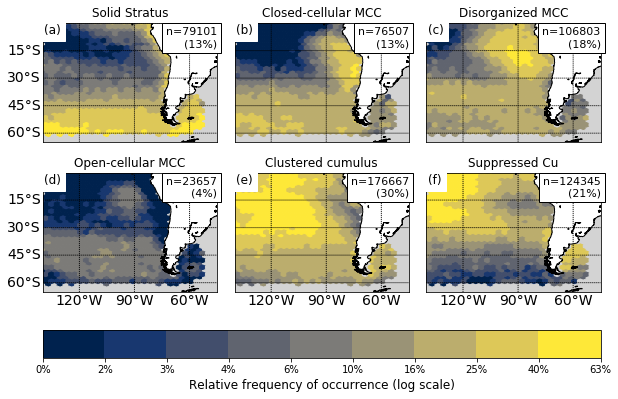

In [33]:
llr = {'lat':(-65,0), 'lon':(220,315)}
ticks = np.logspace(-2, 0, 11)[:-1]
ticks[0]=0
bnorm = colors.BoundaryNorm(boundaries=ticks, ncolors=256)
lnorm = colors.LogNorm(vmin=0.01, vmax=0.7)

fig, ax = plt.subplots()
b = utils.bmap(ax=ax, llr=llr)
image = b.hexbin(plot_df['lon'], plot_df['lat'], gridsize=30, extent=(*llr['lon'], *llr['lat']))
all_counts = image.get_array()+1
plt.close()

polycollections = dict()

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,7), sharex=True, sharey=True)
axn = ax.flatten()
for cat, name  in utils.labels.items():
    axi = axn[utils.ordering.index(cat)]
    df_sub = plot_df[plot_df['cat']==cat]
    par_labs = [1, 0, 0, 0] if cat in [4, 3] else [0, 0, 0, 0]
    mer_labs = [0, 0, 0, 1] if cat in [3, 1, 5] else [0, 0, 0, 0]
    b = utils.bmap(ax=axi, llr=llr, par_labs=par_labs, mer_labs=mer_labs, merspace=30)

    image = b.hexbin(df_sub['lon'], df_sub['lat'], gridsize=30, extent=(*llr['lon'], *llr['lat']), norm=bnorm, cmap='cividis')
    normed_counts = image.get_array()/all_counts
    normed_counts[all_counts==1] = -1
    normed_counts[all_counts<200] = -1
#     image = b.hexbin(plot_df['lon'], plot_df['lat'], gridsize=30, extent=(*llr['lon'], *llr['lat']), vmin=200)
# all_counts = image.get_array()+1
# image.cmap.set_under('w')
    
    image.set_array(normed_counts)
    image.cmap.set_under('lightgrey')
    
    polycollections[cat]=image
    nstr = f"n={sum(df_sub['cat']==cat)}\n({int(sum(df_sub['cat']==cat)*100/len(plot_df))}%)"
    axi.set_title(name)
    axi.annotate(nstr, xy=(1, 0.8), xycoords='axes fraction', fontsize=11, c='k', ha='right', bbox={'facecolor': 'w', 'edgecolor': 'k'})

# add_labels(axn)    
for i, axi in enumerate(axn):
    axi.text(0.01, 0.99, f"({chr(ord('a') + i)})", fontsize=12, backgroundcolor='w',
             horizontalalignment='left', verticalalignment='top', transform=axi.transAxes)

plt.subplots_adjust(hspace=0.1, wspace=0.1)

cb = plt.colorbar(image, ax=axn, ticks=ticks, orientation='horizontal', pad=0.1)
cb.set_ticklabels([f"{i:0.0%}" for i in ticks])
cb.set_label("Relative frequency of occurrence (log scale)", fontsize=12)
fig.savefig('/home/disk/p/jkcm/plots/measures/final/SEP_classifications_map.png', bbox_inches='tight')

In [8]:
ceres_file = glob.glob(os.path.join('/home/disk/eos9/jkcm/Data/ceres/proc/split',
                            f'CERES_SYN1deg-1H_Terra-Aqua-MODIS_Ed4.*.nc'))
ceres_data = xr.open_mfdataset(ceres_file, lock=False)

/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from

In [24]:
high_cloud = ceres_data.cldarea_total_1h-ceres_data.cldarea_low_1h

# np.any((ceres_data.cldarea_total_1h-ceres_data.cldarea_low_1h)<0).values

In [34]:
mean_high_cloud = high_cloud.mean(dim=('time')).compute()

/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


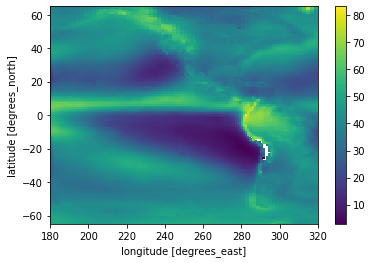

In [35]:
mean_high_cloud.plot()

In [38]:
mean_low_cloud = ceres_data.cldarea_low_1h.mean(dim='time').compute()

/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


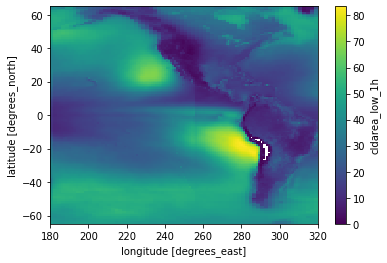

In [40]:
mean_low_cloud.plot()

In [23]:
np.any((ceres_data.cldarea_total_1h-ceres_data.cldarea_low_1h)<10).values

/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


array(True)

/home/disk/p/jkcm/Code/classified_cset/utils.py:417: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  ax=ax, resolution='l', **kwargs)


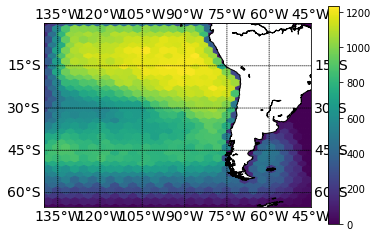

In [5]:
llr = {'lat':(-65,0), 'lon':(220,315)}
ticks = np.logspace(-2, 0, 11)[:-1]
bnorm = colors.BoundaryNorm(boundaries=ticks, ncolors=256)
lnorm = colors.LogNorm(vmin=0.01, vmax=0.7)

fig, ax = plt.subplots()
b = utils.bmap(ax=ax, llr=llr)
image = b.hexbin(plot_df['lon'], plot_df['lat'], gridsize=30, extent=(*llr['lon'], *llr['lat']), vmin=0)
all_counts = image.get_array()+1
image.cmap.set_under('w')

plt.colorbar(image)
# plt.close()

# polycollections = dict()

# fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,7), sharex=True, sharey=True)
# axn = ax.flatten()
# for cat, name  in utils.labels.items():
#     axi = axn[utils.ordering.index(cat)]
#     df_sub = plot_df[plot_df['cat']==cat]
#     par_labs = [1, 0, 0, 0] if cat in [4, 3] else [0, 0, 0, 0]
#     mer_labs = [0, 0, 0, 1] if cat in [3, 1, 5] else [0, 0, 0, 0]
#     b = utils.bmap(ax=axi, llr=llr, par_labs=par_labs, mer_labs=mer_labs, merspace=30)

#     image = b.hexbin(df_sub['lon'], df_sub['lat'], gridsize=30, extent=(*llr['lon'], *llr['lat']), norm=bnorm, cmap='cividis')
#     normed_counts = image.get_array()/all_counts
#     normed_counts[all_counts==1] = np.nan
#     image.set_array(normed_counts)
    
#     polycollections[cat]=image
#     nstr = f"n={sum(df_sub['cat']==cat)}\n({int(sum(df_sub['cat']==cat)*100/len(plot_df))}%)"
#     axi.set_title(name)
#     axi.annotate(nstr, xy=(1, 0.8), xycoords='axes fraction', fontsize=11, c='k', ha='right', bbox={'facecolor': 'w', 'edgecolor': 'k'})

# # add_labels(axn)    
# for i, axi in enumerate(axn):
#     axi.text(0.01, 0.99, f"({chr(ord('a') + i)})", fontsize=12, backgroundcolor='w',
#              horizontalalignment='left', verticalalignment='top', transform=axi.transAxes)

# plt.subplots_adjust(hspace=0.1, wspace=0.1)

# cb = plt.colorbar(image, ax=axn, ticks=ticks, orientation='horizontal', pad=0.1)
# cb.set_ticklabels([f"{i:0.0%}" for i in ticks])
# cb.set_label("Relative frequency of occurrence (log scale)", fontsize=12)
# # fig.savefig('/home/disk/p/jkcm/plots/measures/final/SEP_classifications_map.png', bbox_inches='tight')

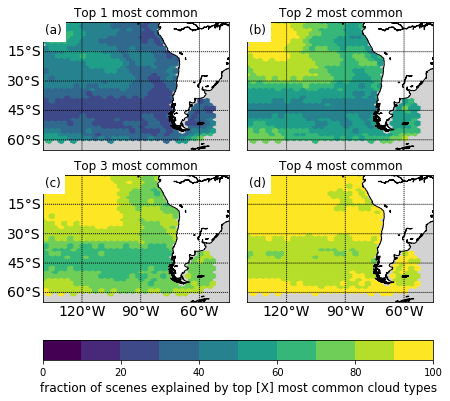

In [32]:
offsets = [i.get_offsets() for _,i in polycollections.items()]
vals = np.array([i.get_array() for _,i in polycollections.items()])
sorted_vals = vals.copy()
sorted_vals.sort(axis=0)
cumsum = np.cumsum(sorted_vals[::-1], axis=0)



llr = {'lat':(-65,0), 'lon':(220,315)}
ticks = np.logspace(-2, 0, 11)[:-1]
bnorm = colors.BoundaryNorm(boundaries=ticks, ncolors=256)
lnorm = colors.LogNorm(vmin=0.01, vmax=0.7)
cmap = plt.get_cmap('viridis', 10)
cmap.set_under('lightgrey')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7,7), sharex=True, sharey=True)
axn = ax.flatten()
for i  in range(4):
    axi = axn[i]
    par_labs = [1, 0, 0, 0] if i%2==0 else [0, 0, 0, 0]
    mer_labs = [0, 0, 0, 1] if i in [2,3] else [0, 0, 0, 0]
    b = utils.bmap(ax=axi, llr=llr, par_labs=par_labs, mer_labs=mer_labs, merspace=30)


    
    image = b.hexbin(plot_df['lon'], plot_df['lat'], gridsize=30, extent=(*llr['lon'], *llr['lat']), vmin=0, vmax=100, cmap=cmap)
    cumsum[i][all_counts<200] = -1
    image.set_array(cumsum[i]*100)
    
    nstr = f"n={sum(df_sub['cat']==cat)}\n({int(sum(df_sub['cat']==cat)*100/len(plot_df))}%)"
    axi.set_title(f'Top {i+1} most common')
#     axi.annotate(nstr, xy=(1, 0.8), xycoords='axes fraction', fontsize=11, c='k', ha='right', bbox={'facecolor': 'w', 'edgecolor': 'k'})

# add_labels(axn)    
for i, axi in enumerate(axn):
    axi.text(0.01, 0.99, f"({chr(ord('a') + i)})", fontsize=12, backgroundcolor='w',
             horizontalalignment='left', verticalalignment='top', transform=axi.transAxes)

plt.subplots_adjust(hspace=0.15, wspace=0.1)

cb = plt.colorbar(image, ax=axn, orientation='horizontal', pad=0.1)
# cb.set_ticklabels([f"{i:0.0%}" for i in ticks])
cb.set_label("fraction of scenes explained by top [X] most common cloud types", fontsize=12)
fig.savefig('/home/disk/p/jkcm/plots/measures/final/top_X_most_common.png', bbox_inches='tight')

/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

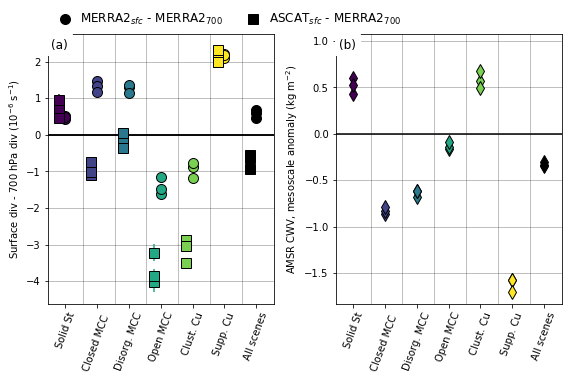

In [22]:
plot_df['MERRA2_ascat_sfc_anomaly'] = plot_df['ascat_div'] + plot_df['MERRA2_div_700']
plot_df['MERRA2_MERRA_sfc_anomaly'] = plot_df['MERRA2_sfc_div'] + plot_df['MERRA2_div_700'] 
plot_df['amsr_cwv_anom'] = plot_df['amsr_cwv'] - plot_df['amsr_cwv_region']
fig, [ax0, ax1] = plt.subplots(figsize=(8,5), ncols=2, nrows=1, sharex=False)
for ax in [ax0, ax1]:
    for xi in [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]:
        ax.axvline(xi+0.05, linestyle='-', color='k', lw=0.5, alpha=0.5)
    ax.grid(axis='y')
    ax.set_xlim((-0.55, 6.55))
merra_merra = dict(marker='o', ms=10, mec='k', label='MERRA2$_{sfc}$ - MERRA2$_{700}$')
ascat_merra = dict(offset=-0.2, marker='s', mec='k', ms=10, label='ASCAT$_{sfc}$ - MERRA2$_{700}$')
amsr_plargs = dict(marker='d', ms=10, mec='k', label='AMSR$_{meso}$ - AMSR$_{syn}$')

utils.plot_mean_by_cat_b(plot_df, 'MERRA2_MERRA_sfc_anomaly', ax=ax0, scale_factor=1e6, **merra_merra)
utils.plot_mean_by_cat_b(plot_df, 'MERRA2_ascat_sfc_anomaly', ax=ax0, scale_factor=1e6, **ascat_merra)
ax0.set_ylabel('Surface div - 700 hPa div (10$^{-6}$ s$^{-1}$)')

utils.plot_mean_by_cat_b(plot_df, 'amsr_cwv_anom', ax=ax1, scale_factor=1, **amsr_plargs)
ax1.set_ylabel('AMSR CWV, mesoscale anomaly (kg m$^{-2}$)')

add_labels([ax0, ax1])
plt.tight_layout()

legend_elements = [Line2D([0], [0], linestyle="None", color='k', **plargs) for plargs in [
    {i:plargs[i] for i in plargs if i!='offset'} for plargs in [merra_merra, ascat_merra]]]
# ax0.legend(handles=legend_elements, loc='best')
ax0.legend(handles=legend_elements, loc='lower left', bbox_to_anchor= (0.0, 1.01), fontsize=12, ncol=2, 
           borderaxespad=0, frameon=False, handletextpad=0.3, columnspacing=1.5)


# fig.savefig('/home/disk/p/jkcm/plots/measures/final/div_anomaly_cwv_anomaly.png', bbox_inches='tight')

/home/disk/p/jkcm/Code/classified_cset/utils.py:417: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  ax=ax, resolution='l', **kwargs)


/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Use the colorbar set_ticks() method instead.


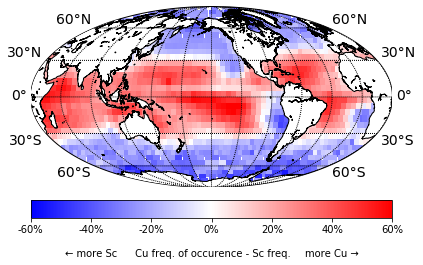

In [3]:
# CLOUD ATLAS PLOT
cu_data = pd.read_table(r'/home/disk/eos4/jkcm/Data/MEASURES/ryan/Annual_av_OMSF_cu', sep='\s+', header=None)
cu_data.columns = ["num", "lat", "lon", "cu_day", "cu_night", "cu_daynight"]
sc_data = pd.read_table(r'/home/disk/eos4/jkcm/Data/MEASURES/ryan/Annual_av_OMSF_sc', sep='\s+', header=None)
sc_data.columns = ["num", "lat", "lon", "sc_day", "sc_night", "sc_daynight"]
assert np.all(np.equal(cu_data.lon, sc_data.lon))
assert np.all(np.equal(cu_data.lat, sc_data.lat))
data = sc_data.copy()
data['cu_day'] = cu_data.cu_day; data['cu_night'] = cu_data.cu_night; data['cu_daynight'] = cu_data.cu_daynight
data['bigger_day'] = [0 if s>c else 1 for s,c in zip(data.sc_day, data.cu_day)]
data['bigger_night'] = [0 if s>c else 1 for s,c in zip(data.sc_night, data.cu_night)]
data['bigger_daynight'] = [0 if s>c else 1 for s,c in zip(data.sc_daynight, data.cu_daynight)]
data['diff'] = data.cu_day - data.sc_day
fig, ax = plt.subplots(figsize=(6,4))
m = utils.bmap(ax=ax, llr={'lat':(-75,75), 'lon':(-180,180)}, merspace=30, parspace=30, projection='moll', lon_0=-150)
sc  = m.scatter(data.lon.values, data.lat.values, c=data['diff'].values, cmap='bwr', latlon=True, marker='s', vmin=-60, vmax=60)
cb = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05)
cb.ax.set_xticks(np.arange(-60, 60, 20))
labels = cb.ax.get_xticklabels()
[l.set_text(f'{t:0.0f}%') for l, t in zip(labels, cb.ax.get_xticks())]
labels[1].set_text(u"-40%\n\n\u2190 more Sc")
labels[-2].set_text(u"40%\n\nmore Cu \u2192")
labels[3].set_text(u"0%\n\n Cu freq. of occurence - Sc freq.")
cb.ax.set_xticklabels(labels);
plt.tight_layout()
# fig.savefig('/home/disk/p/jkcm/plots/measures/final/cu-sc.png', bbox_inches='tight')

/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Use the colorbar set_ticks() method instead.


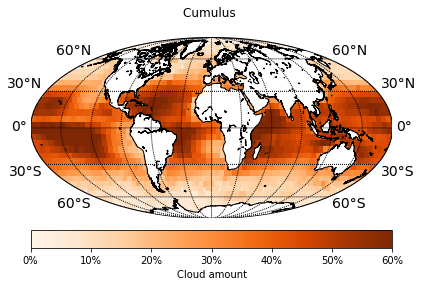

In [14]:
# CLOUD ATLAS PLOT
cu_data = pd.read_table(r'/home/disk/eos4/jkcm/Data/MEASURES/ryan/Annual_av_OMSF_cu', sep='\s+', header=None)
cu_data.columns = ["num", "lat", "lon", "cu_day", "cu_night", "cu_daynight"]
sc_data = pd.read_table(r'/home/disk/eos4/jkcm/Data/MEASURES/ryan/Annual_av_OMSF_sc', sep='\s+', header=None)
sc_data.columns = ["num", "lat", "lon", "sc_day", "sc_night", "sc_daynight"]
assert np.all(np.equal(cu_data.lon, sc_data.lon))
assert np.all(np.equal(cu_data.lat, sc_data.lat))
data = sc_data.copy()
data['cu_day'] = cu_data.cu_day; data['cu_night'] = cu_data.cu_night; data['cu_daynight'] = cu_data.cu_daynight
data['bigger_day'] = [0 if s>c else 1 for s,c in zip(data.sc_day, data.cu_day)]
data['bigger_night'] = [0 if s>c else 1 for s,c in zip(data.sc_night, data.cu_night)]
data['bigger_daynight'] = [0 if s>c else 1 for s,c in zip(data.sc_daynight, data.cu_daynight)]
data['diff'] = data.cu_day - data.sc_day
fig, ax = plt.subplots(figsize=(6,4))
m = utils.bmap(ax=ax, llr={'lat':(-75,75), 'lon':(-180,180)}, merspace=30, parspace=30, projection='moll', lon_0=0)
sc  = m.scatter(data.lon.values, data.lat.values, c=data['cu_daynight'].values, cmap='Oranges', latlon=True, marker='s', vmin=0, vmax=60)
cb = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='Cloud amount')
cb.ax.set_xticks(np.arange(-60, 60, 20))
labels = cb.ax.get_xticklabels()
[l.set_text(f'{t:0.0f}%') for l, t in zip(labels, cb.ax.get_xticks())]
# labels[1].set_text(u"-40%\n\n\u2190 more Sc")
# labels[-2].set_text(u"40%\n\nmore Cu \u2192")
# labels[3].set_text(u"0%\n\n Cu freq. of occurence - Sc freq.")
cb.ax.set_xticklabels(labels);

ax.set_title('Cumulus \n')
plt.tight_layout()
fig.savefig('/home/disk/p/jkcm/plots/defense/cu_climo.png', bbox_inches='tight')

In [30]:
plot_df['ASTD'] = plot_df['MERRA2_T2M'] - plot_df['MERRA2_SST']
plot_df['ASTD_region'] = plot_df['MERRA2_T2M_region'] - plot_df['MERRA2_SST_region']
plot_df['ASTD_climo'] = plot_df['MERRA2_T2M_climo'] - plot_df['MERRA2_SST_climo']

/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

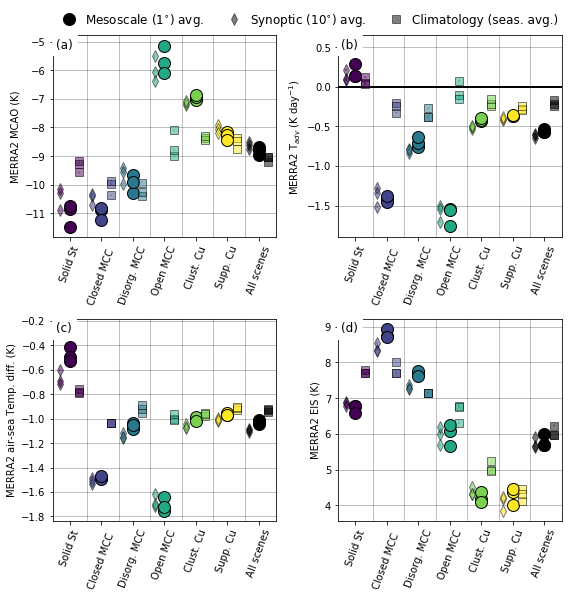

In [33]:
# TADv plot
fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(figsize=(8,8), ncols=2, nrows=2, sharex=False)

plot_all_var(plot_df, 'MERRA2_M', ax0, ylabel='MERRA2 MCAO (K)', args_dict=args_dict)
plot_all_var(plot_df, 'MERRA2_T_adv', ax1, scale=86400, ylabel='MERRA2 T$_{adv}$ (K day$^{-1}$)', args_dict=args_dict)
plot_all_var(plot_df, 'ASTD', ax2, ylabel='MERRA2 air-sea Temp. diff. (K)', args_dict=args_dict)
plot_all_var(plot_df, 'MERRA2_EIS', ax3, ylabel='MERRA2 EIS (K)', args_dict=args_dict)



add_labels([ax0, ax1, ax2, ax3])
plt.tight_layout()
legend_elements = [Line2D([0], [0], linestyle="None", color='k', **plargs) for plargs in [
    {i:plargs[i] for i in plargs if i!='offset'} for plargs in [local_plargs, region_plargs, climo_plargs]]]
ax0.legend(handles=legend_elements, loc='lower left', bbox_to_anchor= (0.0, 1.01), fontsize=12, ncol=3, 
           borderaxespad=0, frameon=False, handletextpad=0.3, columnspacing=1.5)

fig.savefig('/home/disk/p/jkcm/plots/measures/final/McCoy_2017_results.png', bbox_inches='tight')

In [29]:
[i for i in plot_df.columns if not ('_region' in i or '_climo' in i)]

['cat',
 'cert',
 'date',
 'high_cf',
 'i',
 'j',
 'lat',
 'loc',
 'lon',
 'low_cf',
 'name',
 'sensor_zenith',
 'year',
 'datetime',
 'granule',
 'day',
 'month',
 'locyear',
 'season',
 'MERRA_sfc_div',
 'MERRA_div_700',
 'MERRA_SST',
 'MERRA_EIS',
 'MERRA_LTS',
 'MERRA_RH_700',
 'MERRA_WSPD_10M',
 'ascat_div',
 'ascat_div_std',
 'amsr_cwv',
 'ceres_net_cre',
 'ceres_low_cf',
 'amsr_tb_rate',
 'amsr_tb_rwr',
 'amsr_tb_prob',
 'MERRA2_sfc_div',
 'MERRA2_div_700',
 'MERRA2_SST',
 'MERRA2_EIS',
 'MERRA2_LTS',
 'MERRA2_RH_700',
 'MERRA2_WSPD_10M',
 'MERRA2_PS',
 'MERRA2_TQV',
 'MERRA2_TQL',
 'MERRA2_T2M',
 'MERRA2_M',
 'MERRA2_T_adv',
 'MERRA2_T_700',
 'MERRA2_ISCCPALB',
 'MERRA2_MDSCLDFRCLO',
 'MERRA_ascat_sfc_anomaly',
 'MERRA_MERRA_sfc_anomaly',
 'amsr_cwv_anom',
 'MERRA2_ascat_sfc_anomaly',
 'MERRA2_MERRA_sfc_anomaly']